In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr

import env
import wrangle

Our Telco scenario continues:

As a customer analyst for Telco, you want to know who has spent the most money with the company over their lifetime. You have monthly charges and tenure, so you think you will be able to use those two attributes as features to estimate total charges. You need to do this within an average of $5.00 per customer.

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.

Do your work in a notebook named explore.ipynb. In addition, you should create a file named explore.py that contains the following functions for exploring your variables (features & target).

In [3]:
df = wrangle.get_telco_data()
df = wrangle.prep_telco(df)
df

Sorry, nothing on file, let me create one for you...


,customer_id,tenure,total_charges,monthly_charges
0,0002-ORFBO,9,593.30,65.60
1,0003-MKNFE,9,542.40,59.90
2,0004-TLHLJ,4,280.85,73.90
3,0011-IGKFF,13,1237.85,98.00
4,0013-EXCHZ,3,267.40,83.90
...,...,...,...,...
7038,9987-LUTYD,13,742.90,55.15
7039,9992-RRAMN,22,1873.70,85.10
7040,9992-UJOEL,2,92.75,50.30
7041,9993-LHIEB,67,4627.65,67.85


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      7043 non-null   object 
 1   tenure           7043 non-null   int64  
 2   total_charges    7043 non-null   float64
 3   monthly_charges  7043 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 220.2+ KB


1. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [5]:
# split data into train validation and test sets
train, validate, test = wrangle.split_dataframe(df)

In [6]:
# create a correlation matrix
# question: what is the correlation between the variables?
corr = train.corr()
corr

,tenure,total_charges,monthly_charges
tenure,1.000000,0.830238,0.267091
total_charges,0.830238,1.000000,0.658219
monthly_charges,0.267091,0.658219,1.000000


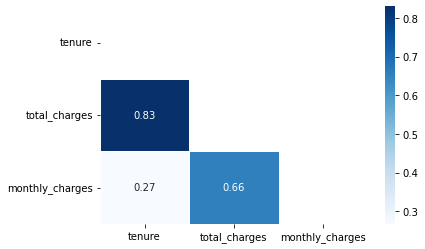

In [7]:
# create a heatmap of the correlation matrix
sns.heatmap(corr, cmap='Blues', annot=True, linewidth=0.5, mask= np.triu(corr))
plt.show()

In [8]:
# Use a scipy stats function pearsonr to calculate the correlation coefficient and the p-value.
# question: what is the pearson r and p-value of total charges and tenure?
r, p_value = pearsonr(train['total_charges'], train['tenure'])
print(f"The correlation coefficient(r) is {r} and the p-value is {p_value}")

The correlation coefficient(r) is 0.830238183000995 and the p-value is 0.0


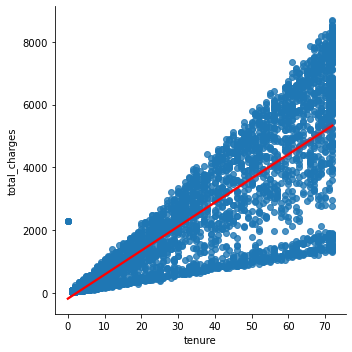

In [9]:
# create a regression line scatter plot
sns.lmplot(x='tenure', y='total_charges', data=train, line_kws={'color':'red'})
plt.show()

2. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [10]:
# create a function that plots variable pairs and returns a list of the plots
def plot_variable_pairs(data_set):
    sns.pairplot(data_set, hue="tenure")
    sns.set(style='whitegrid', palette='muted')
    plt.show()
    return train

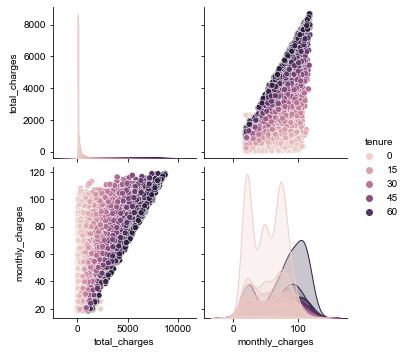

,customer_id,tenure,total_charges,monthly_charges
885,1291-CUOCY,72,7962.20,110.60
2894,4123-DVHPH,9,801.30,88.05
1049,1534-OULXE,61,2961.40,49.70
3768,5306-BVTKJ,48,2651.20,55.80
1849,2683-JXWQQ,61,2117.20,33.60
...,...,...,...,...
819,1196-AMORA,7,520.00,73.60
1626,2368-GAKKQ,70,7939.25,113.65
967,1400-MMYXY,3,334.65,105.90
5016,7049-GKVZY,17,1387.35,79.85


In [11]:
# plot the variable pairs
plot_variable_pairs(train)

3. Write a function named months_to_years that accepts your telco churn dataframe and returns a dataframe with a new feature tenure_years, in complete years as a customer.

In [12]:
def months_to_years(df):
    df['tenure_years'] = (df['tenure'] / 12).astype(int)
    return df

In [13]:
months_to_years(train)

,customer_id,tenure,total_charges,monthly_charges,tenure_years
885,1291-CUOCY,72,7962.20,110.60,6
2894,4123-DVHPH,9,801.30,88.05,0
1049,1534-OULXE,61,2961.40,49.70,5
3768,5306-BVTKJ,48,2651.20,55.80,4
1849,2683-JXWQQ,61,2117.20,33.60,5
...,...,...,...,...,...
819,1196-AMORA,7,520.00,73.60,0
1626,2368-GAKKQ,70,7939.25,113.65,5
967,1400-MMYXY,3,334.65,105.90,0
5016,7049-GKVZY,17,1387.35,79.85,1


4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [15]:
def plot_categorical_and_continuous_vars(df, continuous_var, categorical_var):
    # Plot the distribution of the continuous variable
    sns.distplot(df[continuous_var])
    # labels
    plt.xlabel(continuous_var)
    plt.ylabel('Frequency')
    plt.show()
    # Plot the distribution of the categorical variable
    sns.boxplot(df[categorical_var])
    # labels
    plt.xlabel(categorical_var)
    plt.ylabel('Frequency')
    plt.show()
    # Plot the bar plot of the continuous and categorical variables
    sns.swarmplot(x=categorical_var, y=continuous_var, data=df)
    # labels
    plt.xlabel(categorical_var)
    plt.ylabel(continuous_var)
    plt.show()
    sns.jointplot(x=categorical_var, y=continuous_var, data=df, kind='reg')
    plt.show()
    return df

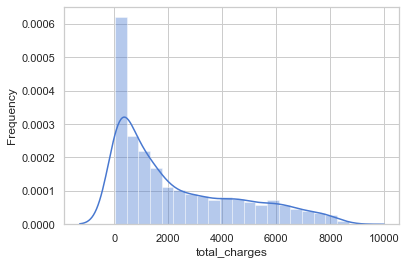

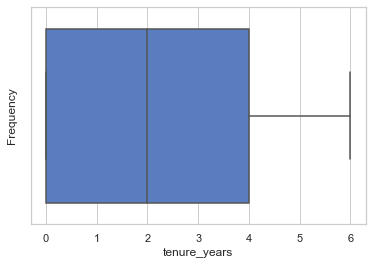

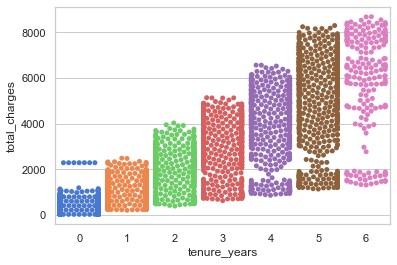

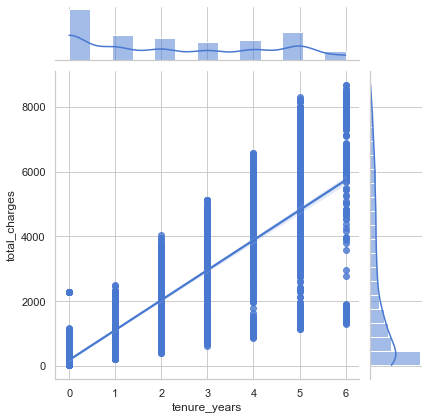

,customer_id,tenure,total_charges,monthly_charges,tenure_years
885,1291-CUOCY,72,7962.20,110.60,6
2894,4123-DVHPH,9,801.30,88.05,0
1049,1534-OULXE,61,2961.40,49.70,5
3768,5306-BVTKJ,48,2651.20,55.80,4
1849,2683-JXWQQ,61,2117.20,33.60,5
...,...,...,...,...,...
819,1196-AMORA,7,520.00,73.60,0
1626,2368-GAKKQ,70,7939.25,113.65,5
967,1400-MMYXY,3,334.65,105.90,0
5016,7049-GKVZY,17,1387.35,79.85,1


In [16]:
plot_categorical_and_continuous_vars(train, 'total_charges', 'tenure_years')


5. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

No handles with labels found to put in legend.


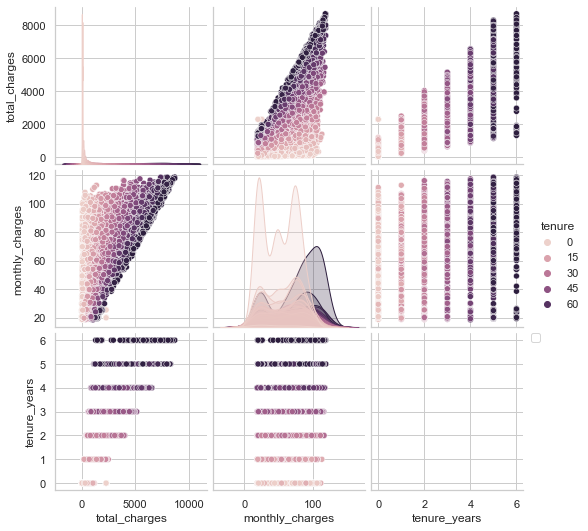

,customer_id,tenure,total_charges,monthly_charges,tenure_years
885,1291-CUOCY,72,7962.20,110.60,6
2894,4123-DVHPH,9,801.30,88.05,0
1049,1534-OULXE,61,2961.40,49.70,5
3768,5306-BVTKJ,48,2651.20,55.80,4
1849,2683-JXWQQ,61,2117.20,33.60,5
...,...,...,...,...,...
819,1196-AMORA,7,520.00,73.60,0
1626,2368-GAKKQ,70,7939.25,113.65,5
967,1400-MMYXY,3,334.65,105.90,0
5016,7049-GKVZY,17,1387.35,79.85,1


In [ ]:
import explore
explore.plot_variable_pairs(train)

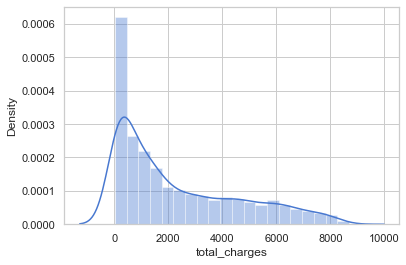

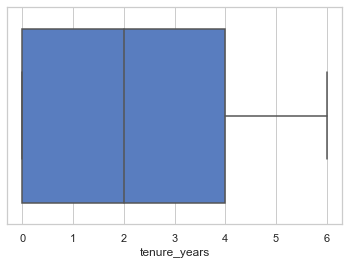

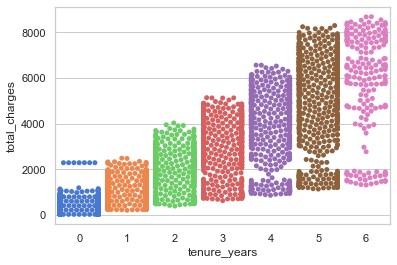

,customer_id,tenure,total_charges,monthly_charges,tenure_years
885,1291-CUOCY,72,7962.20,110.60,6
2894,4123-DVHPH,9,801.30,88.05,0
1049,1534-OULXE,61,2961.40,49.70,5
3768,5306-BVTKJ,48,2651.20,55.80,4
1849,2683-JXWQQ,61,2117.20,33.60,5
...,...,...,...,...,...
819,1196-AMORA,7,520.00,73.60,0
1626,2368-GAKKQ,70,7939.25,113.65,5
967,1400-MMYXY,3,334.65,105.90,0
5016,7049-GKVZY,17,1387.35,79.85,1


In [ ]:
# utilized explore.py to call the function
explore.plot_categorical_and_continuous_vars(train, 'total_charges', 'tenure_years')

6. Explore your dataset with any other visualizations you think will be helpful.